In [36]:
from plotnine.data import economics
import plotnine as p9
import pandas as pd
import sklearn
import numpy as np
import xlrd, openpyxl

In [37]:
def lin_reg(X , y):
    reg = sklearn.linear_model.LinearRegression().fit(X, y)
    return [reg.score(X, y), reg.coef_, reg.intercept_, reg.predict(X)]


In [38]:
### File Read-In ###
pfas_df = pd.read_excel("/Users/ciaraconway/Documents/all_databases/NHANES_data/2017-2018/laboratory_data/PFAS_J.xlsx", sheet_name='Sheet1')

chole_df = pd.read_excel("/Users/ciaraconway/Documents/all_databases/NHANES_data/2017-2018/laboratory_data/TCHOL_J.xlsx", sheet_name='Sheet1')

merg_df = pd.merge(pfas_df, chole_df, how="left", on=["SEQN"])

merg_df

,SEQN,WTSB2YR,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFNA,LBDPFNAL,...,LBXNFOA,LBDNFOAL,LBXBFOA,LBDBFOAL,LBXNFOS,LBDNFOSL,LBXMFOS,LBDMFOSL,LBXTC,LBDTCSI
0,93706,26027.047633,0.50,0.0,0.9,0.0,0.07,1.0,1.8,0.0,...,1.6,0.0,0.07,1.0,6.1,0.0,1.0,0.0,148.0,3.83
1,93715,28400.583165,0.30,0.0,1.3,0.0,0.10,0.0,0.6,0.0,...,2.0,0.0,0.07,1.0,6.2,0.0,2.3,0.0,180.0,4.65
2,93717,141021.884734,0.40,0.0,1.4,0.0,0.30,0.0,1.0,0.0,...,1.9,0.0,0.07,1.0,9.6,0.0,2.3,0.0,213.0,5.51
3,93721,23886.495609,0.20,0.0,0.8,0.0,0.07,1.0,0.5,0.0,...,2.1,0.0,0.07,1.0,2.0,0.0,1.2,0.0,122.0,3.15
4,93723,703434.332051,0.30,0.0,2.9,0.0,0.10,0.0,0.6,0.0,...,1.7,0.0,0.07,1.0,7.0,0.0,4.5,0.0,202.0,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,102933,55613.356912,0.10,0.0,0.4,0.0,0.20,0.0,0.2,0.0,...,1.1,0.0,0.07,1.0,2.0,0.0,0.6,0.0,149.0,3.85
2129,102943,91163.659154,0.20,0.0,0.4,0.0,0.10,0.0,0.3,0.0,...,1.2,0.0,0.07,1.0,1.6,0.0,0.6,0.0,223.0,5.77
2130,102945,69191.312586,0.10,0.0,3.0,0.0,0.07,1.0,0.2,0.0,...,1.4,0.0,0.07,1.0,1.9,0.0,0.7,0.0,116.0,3.00
2131,102952,68053.967994,0.20,0.0,3.9,0.0,2.70,0.0,1.2,0.0,...,5.3,0.0,0.70,0.0,7.0,0.0,5.2,0.0,119.0,3.08


In [52]:
PFOA_chole = pd.DataFrame(data=[merg_df["SEQN"], np.log10(merg_df["LBXNFOA"]), np.log10(merg_df["LBXNFOS"]),merg_df["LBDTCSI"]] ).transpose().fillna(0)
PFOA_chole

,SEQN,LBXNFOA,LBXNFOS,LBDTCSI
0,93706.0,0.204120,0.785330,3.83
1,93715.0,0.301030,0.792392,4.65
2,93717.0,0.278754,0.982271,5.51
3,93721.0,0.322219,0.301030,3.15
4,93723.0,0.230449,0.845098,5.22
...,...,...,...,...
2128,102933.0,0.041393,0.301030,3.85
2129,102943.0,0.079181,0.204120,5.77
2130,102945.0,0.146128,0.278754,3.00
2131,102952.0,0.724276,0.845098,3.08


In [70]:
X = PFOA_chole[["LBXNFOA"]]
y = PFOA_chole[["LBDTCSI"]]
reg_list = lin_reg(X, y)
print(reg_list)
PFOA_chole["Predicted_y"] = reg_list[3]
#PFOA_chole

[0.0160136077001255, array([[0.70373583]]), array([4.30353886]), array([[4.44718541],
       [4.51538446],
       [4.49970776],
       ...,
       [4.4063744 ],
       [4.81323775],
       [4.09169327]])]


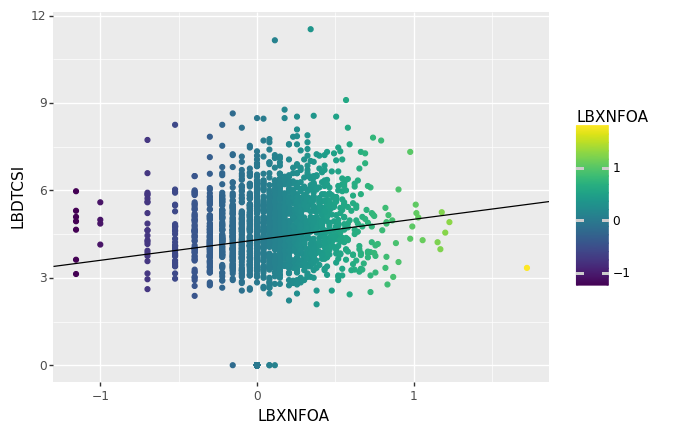

<ggplot: (8788933374117)>

In [71]:
(p9.ggplot(data = PFOA_chole, mapping=p9.aes(x='LBXNFOA', y="LBDTCSI", color='LBXNFOA')) + p9.geom_point() + p9.geom_abline(intercept=4.30353886, slope=0.70373583))
#(p9.ggplot(data= PFOA_chole, mapping=p9.aes(y='Predicted_y', x="LBDTCSI")) + p9.geom_line())

In [68]:
X = PFOA_chole[["LBXNFOS"]]
y = PFOA_chole[["LBDTCSI"]]
reg_list = lin_reg(X, y)
print(reg_list)
PFOA_chole["Predicted_y"] = reg_list[3]


[0.09945455680578719, array([[1.27274074]]), array([3.81398154]), array([[4.81350282],
       [4.82249073],
       [5.06415816],
       ...,
       [4.1687626 ],
       [4.88957225],
       [3.81398154]])]


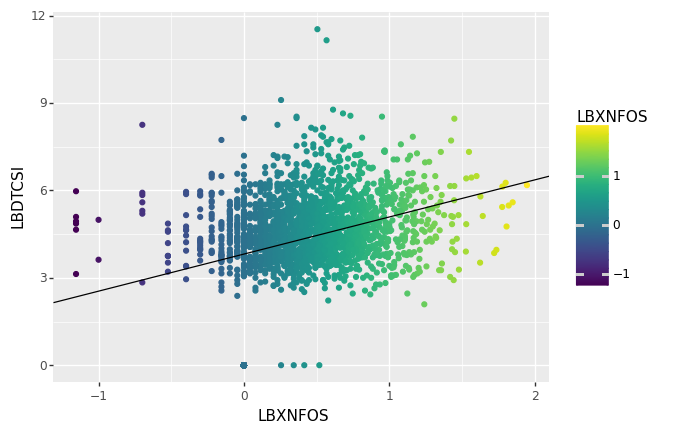

<ggplot: (8788929843881)>

In [69]:
(p9.ggplot(data = PFOA_chole, mapping=p9.aes(x='LBXNFOS', y="LBDTCSI", color='LBXNFOS')) + p9.geom_point() + p9.geom_abline(intercept=3.81398154, slope=1.27274074))


In [ ]:
### File Read-In ###
pfas_df = pd.read_excel("/Users/ciaraconway/Documents/all_databases/NHANES_data/2017-2018/laboratory_data/PFAS_J.xlsx", sheet_name='Sheet1')

chole_df = pd.read_excel("/Users/ciaraconway/Documents/all_databases/NHANES_data/2017-2018/laboratory_data/TRIGLY_J.xlsx", sheet_name='Sheet1')

merg_df = pd.merge(pfas_df, chole_df, how="left", on=["SEQN"])

merg_df

In [ ]:
PFOA_chole = pd.DataFrame(data=[merg_df["SEQN"], merg_df["LBXNFOA"], merg_df["LBXNFOS"],merg_df["LBDTCSI"]] ).transpose().fillna(0)
PFOA_chole
